# lstm

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 데이터 불러오기
dt = pd.read_csv("gangseo.csv")

 4802177320


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


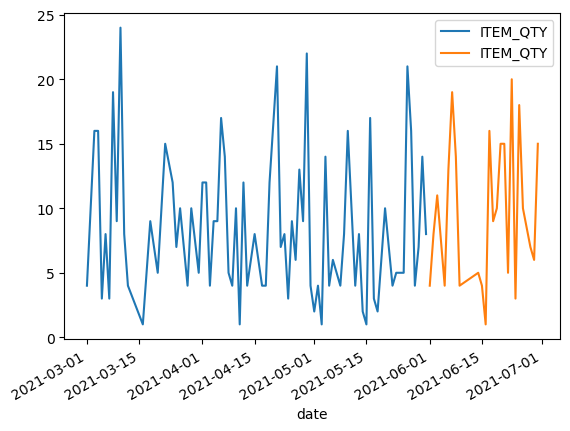

In [8]:
# 품목코드 입력 및 일별 판매량 시각화
a = input() #품목코드 입력
dt2 = dt['cd'] == int(a)
dt2 =pd.DataFrame(dt[dt2])
dt1 = dt2[['date','ITEM_QTY']]
dt1['date'] = pd.to_datetime(dt1['date'])
dt1=dt1.set_index('date')
split_date = pd.Timestamp('2021-05-31T23') #train, test셋의 기준점
split_date
train=dt1.loc[:str(split_date),['ITEM_QTY']]
test=dt1.loc[str(split_date):,['ITEM_QTY']]
ax=train.plot()
test.plot(ax=ax)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 83.6090
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 37.7535
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 27.8789
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 28.0749
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 27.7293
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 26.7986
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 26.6620
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 26.1836
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 25.7735
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 25.6184
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 24.5707
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 25.2730
Epoch 13/200
4/4 [==============================]

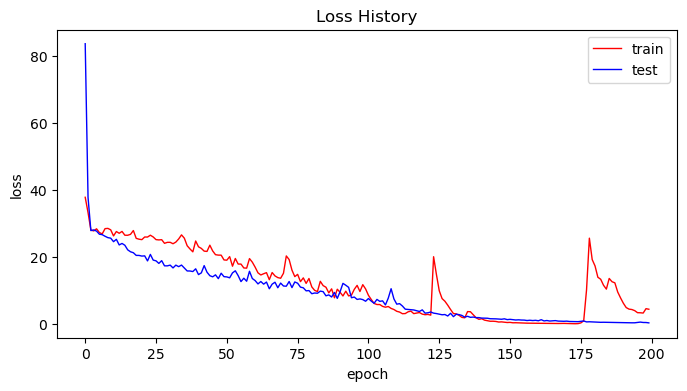

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:176: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:177: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:178: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.


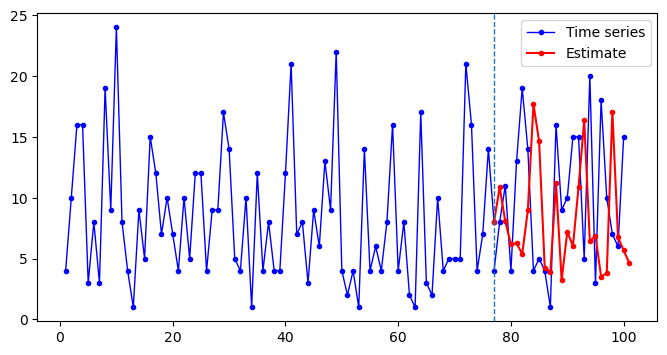

In [87]:
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 매번 달라지는 값을 방지하기 위한 seed값 고정
tf.random.set_seed(1000)

# 1차원 배열의 시계열 데이터로 학습용 배치 파일을 만든다. 입력값 = 1개, 출력값 = 1개

# return : xBatch - RNN 입력

#          yBatch - RNN 출력

#

# step = 3 인 경우의 예시

# xData = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

# 

# xBatch, yBatch는 3차원 텐서로 만든다. (-1, step=3, 1)

# xBatch = [[1]] [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] --> 7 x 3 x 1

#          [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] [[8]]

#          [[3]] [[4]] [[5]] [[6]] [[7]] [[8]] [[9]]

#

# yBatch =  [4]   [5]   [6]   [7]   [8]   [9]   [10] --> 7 x 1

#

# ex : xBatch[0] = [[3],[4],[5]],   yBatch[0] = [6]

#      3-step 짜리 LSTM에 3,4,5가 입력되면 6이 출력되도록 학습한다.

def createTrainData(xData, step):

    m = np.arange(len(xData) - step)

    

    x, y = [], []

    for i in m:

        a = xData[i:(i+step)]

        x.append(a)

    xBatch = np.reshape(np.array(x), (len(m), step, 1))

    

    for i in m+1:

        a = xData[i:(i+step)]

        y.append(a[-1])

    yBatch = np.reshape(np.array(y), (len(m), 1))

    
    
    return xBatch, yBatch



#데이터
data = train['ITEM_QTY']
data1 = test['ITEM_QTY']

nInput = 1

nOutput = 1

nStep = 12

nHidden = 100



# 학습 데이터를 생성한다.

x, y = createTrainData(data, nStep)
tx, ty = createTrainData(data1, nStep)




# LSTM 모델을 생성한다.

xInput = Input(batch_shape=(None, nStep, 1))

xLstm = LSTM(nHidden)(xInput)

xOutput = Dense(nOutput)(xLstm)

model = Model(xInput, xOutput)

model.compile(loss='mse', optimizer=Adam(lr=0.01))



# 학습한다
h1 = model.fit(tx, ty, epochs=200, batch_size=3, shuffle=True) #파라미터설정
h = model.fit(x, y, epochs=200, batch_size=3,  shuffle=True) #파라미터설정


nFuture = len(test)

if len(data) > 300:

    lastData = np.copy(data[-300:])  # 원 데이터의 마지막 300개만 그려본다

else:

    lastData = np.copy(data)

if len(data1) > 300:

    lastData1 = np.copy(data1[-300:])  # 원 데이터의 마지막 300개만 그려본다

else:

    lastData1 = np.copy(data1)

dx = np.copy(lastData)

estimate = [dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다
    px = dx[-nStep:].reshape(1, nStep, 1)

    

    # 다음 값을 예측한다.
    yHat = model.predict(px)[0][0]

        

    # 예측값을 저장해 둔다
    estimate.append(yHat)

    

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    dx = np.insert(dx, len(dx), yHat)



# Loss history를 그린다
plt.figure(figsize=(8, 4))
plt.plot(h.history['loss'], color='red', markersize=3, label='train', linewidth=1)
plt.plot(h1.history['loss'], color='blue', markersize=3, label='test', linewidth=1)
plt.title("Loss History")
plt.xlabel("epoch")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
plt.ylabel("loss")
plt.legend()
plt.show()

# 원 시계열과 예측된 시계열을 그린다
ax1 = np.arange(1, len(lastData) + 1)
ax11 = np.arange(len(lastData), len(lastData)+len(lastData1))
ax2 = np.arange(len(lastData), len(lastData) + len(estimate))
plt.figure(figsize=(8, 4))
plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, linewidth=1)
plt.plot(ax11, lastData1, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimate')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.legend()
plt.show()


In [88]:
# 정확도를 위한 rmse값
rmse = np.sqrt(model.evaluate(tx,ty))
rmse

1/1 [==============================] - 0s 355ms/step - loss: 72.7900


8.53170786317136

# 여기부턴 7월 예측입니다

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
# 데이터 불러오기
dt = pd.read_csv("gangseo.csv")

 4802177320


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


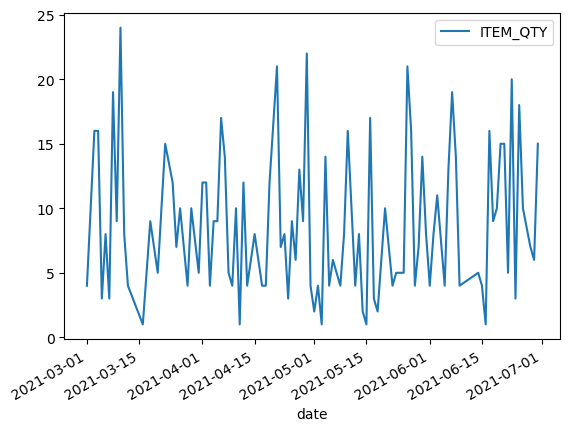

In [51]:
# 품목코드 입력받고 6월까지의 데이터 시각화
a = input()
dt2 = dt['cd'] == int(a)
dt2 =pd.DataFrame(dt[dt2])
dt1 = dt2[['date','ITEM_QTY']]
dt1['date'] = pd.to_datetime(dt1['date'])
dt1=dt1.set_index('date')
split_date = pd.Timestamp('2021-06-30T23')
split_date
train=dt1.loc[:str(split_date),['ITEM_QTY']]
ax=train.plot()
plt.show()


C:\Users\user\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
3/3 [==============================] - 6s 22ms/step - loss: 69.3758
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 30.1081
Epoch 3/200
3/3 [==============================] - 0s 18ms/step - loss: 30.9458
Epoch 4/200
3/3 [==============================] - 0s 16ms/step - loss: 30.8830
Epoch 5/200
3/3 [==============================] - 0s 17ms/step - loss: 28.5848
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 28.1834
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 28.6803
Epoch 8/200
3/3 [==============================] - 0s 16ms/step - loss: 28.9944
Epoch 9/200
3/3 [==============================] - 0s 17ms/step - loss: 28.8025
Epoch 10/200
3/3 [==============================] - 0s 17ms/step - loss: 28.6935
Epoch 11/200
3/3 [==============================] - 0s 16ms/step - loss: 28.5165
Epoch 12/200
3/3 [==============================] - 0s 17ms/step - loss: 28.5372
Epoch 13/200
3/3 [===================

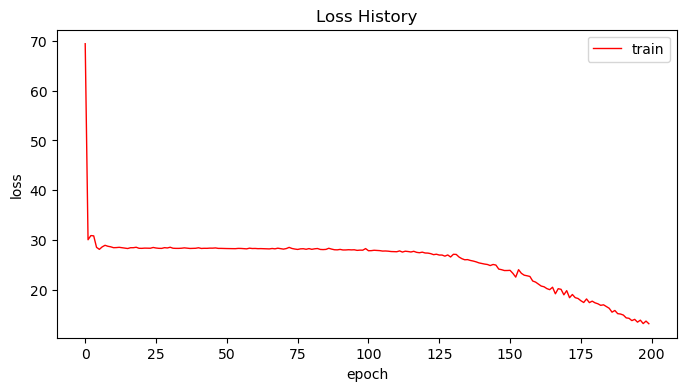

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:118: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:119: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.


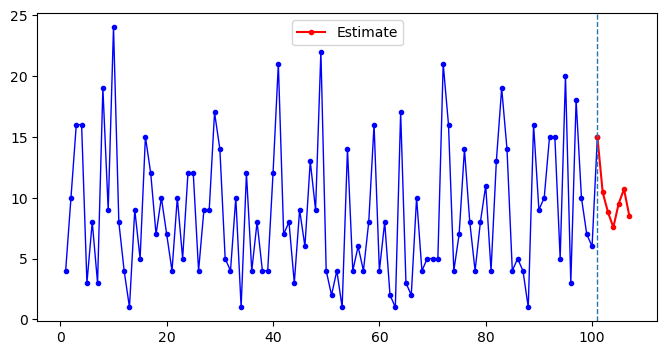

In [52]:
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# 매번 바뀌는 값을 방지하기 위한 seed값 고정
tf.random.set_seed(1000)

def createTrainData(xData, step):

    m = np.arange(len(xData) - step)

    

    x, y = [], []

    for i in m:

        a = xData[i:(i+step)]

        x.append(a)

    xBatch = np.reshape(np.array(x), (len(m), step, 1))

    

    for i in m+1:

        a = xData[i:(i+step)]

        y.append(a[-1])

    yBatch = np.reshape(np.array(y), (len(m), 1))

    
    
    return xBatch, yBatch



# 데이터

data = train['ITEM_QTY']

nInput = 1

nOutput = 1

nStep = 12

nHidden = 100

# 학습 데이터를 생성한다.

x, y = createTrainData(data, nStep)


# LSTM 모델을 생성한다.

xInput = Input(batch_shape=(None, nStep, 1))

xLstm = LSTM(nHidden)(xInput)

xOutput = Dense(nOutput)(xLstm)

model = Model(xInput, xOutput)

model.compile(loss='mse', optimizer=Adam(lr=0.01))

# 학습한다
h = model.fit(x, y, epochs=200, batch_size=32,  shuffle=True) # 파라미터 설정

# 예측기간
nFuture = 6

if len(data) > 300:

    lastData = np.copy(data[-300:])  # 원 데이터의 마지막 300개만 그려본다

else:

    lastData = np.copy(data)


dx = np.copy(lastData)

estimate = [dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다
    px = dx[-nStep:].reshape(1, nStep, 1)

    # 다음 값을 예측한다.
    yHat = model.predict(px)[0][0]

    # 예측값을 저장해 둔다
    estimate.append(yHat)

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    dx = np.insert(dx, len(dx), yHat)

# Loss history를 그린다
plt.figure(figsize=(8, 4))
plt.plot(h.history['loss'], color='red', markersize=3, label='train', linewidth=1)
plt.title("Loss History")
plt.xlabel("epoch")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
plt.ylabel("loss")
plt.legend()
plt.show()

# 원 시계열과 예측된 시계열을 그린다
ax1 = np.arange(1, len(lastData) + 1)
ax2 = np.arange(len(lastData), len(lastData) + len(estimate))
plt.figure(figsize=(8, 4))
plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, linewidth=1)
plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimate')
plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

In [57]:
# 예측한값을 csv파일로 저장
import csv
sresult = 0

# 7일까지 판매갯수 합을 sresult에 저장
for i in range(0,len(estimate)):
    sresult = sresult + estimate[i]

# 7일까지 예측한 정수값을 반올림
for i in range(0,len(estimate)):
    estimate[i] = round(estimate[i])

# 7일까지 예측한값에 판매갯수 합을 추가
estimate.append(sresult)

with open('7월예측gangnam_'+str(a)+'.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(estimate)